## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing the data
file_name = "/Users/tommaso/data/data_000637.txt"
data = pd.read_csv(file_name)
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [4]:
# We sort the data by the value of ORBIT
data = data.sort_values(['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], ignore_index=True)

In [5]:
data.loc[:,['ORBIT_CNT','BX_COUNTER']]

,ORBIT_CNT,BX_COUNTER
0,3869200167,2374
1,3869200167,2374
2,3869200167,2553
3,3869200167,2558
4,3869200167,2760
...,...,...
1310715,3869211171,762
1310716,3869211171,762
1310717,3869211171,763
1310718,3869211171,764


In [6]:
# To find x
x = data['BX_COUNTER'].max() + 1
print(x)

3564


In [7]:
# To find the time elapsed
time_elapsed = (data['ORBIT_CNT'][len(data['ORBIT_CNT'])-1]-(data['ORBIT_CNT'][0]))*x*25 + (data['BX_COUNTER'][len(data['BX_COUNTER'])-1]-(data['BX_COUNTER'][0]))*25 + (data['TDC_MEAS'][len(data['TDC_MEAS'])-1]-(data['TDC_MEAS'][0]))*(25/30)

In [8]:
print('The total time elapsed is:\n', time_elapsed)

The total time elapsed is:
 980416253.3333334


In [9]:
# Creating a column for the absolute time elapsed
data['abs_time'] = (data['ORBIT_CNT']-(data['ORBIT_CNT'][0]))*x*25 + (data['BX_COUNTER']-(data['BX_COUNTER'][0]))*25 + (data['TDC_MEAS']-(data['TDC_MEAS'][0]))*(25/30)





In [19]:
# Taking a peak at the data
data.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,0.000000
1,1,0,124,3869200167,2374,27,0.833333
2,1,0,63,3869200167,2553,28,4476.666667
3,1,0,64,3869200167,2558,19,4594.166667
4,1,0,64,3869200167,2760,25,9649.166667
5,0,0,63,3869200167,2762,4,9681.666667
6,1,0,61,3869200167,2772,14,9940.000000
7,0,0,62,3869200167,2774,21,9995.833333
8,0,0,139,3869200167,2776,0,10028.333333
9,1,1,7,3869200167,2785,4,10256.666667


In [11]:
# Replacing the head column randomly with 0s and 1s
data.loc[:,'HEAD'] = np.random.randint(0, 2, len(data))

In [20]:
data.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,0.000000
1,1,0,124,3869200167,2374,27,0.833333
2,1,0,63,3869200167,2553,28,4476.666667
3,1,0,64,3869200167,2558,19,4594.166667
4,1,0,64,3869200167,2760,25,9649.166667
5,0,0,63,3869200167,2762,4,9681.666667
6,1,0,61,3869200167,2772,14,9940.000000
7,0,0,62,3869200167,2774,21,9995.833333
8,0,0,139,3869200167,2776,0,10028.333333
9,1,1,7,3869200167,2785,4,10256.666667


In [13]:
# We create a dataset containing data where head = 1
data2 = data[data['HEAD']==1]

In [21]:
data2.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
1,1,0,124,3869200167,2374,27,0.833333
2,1,0,63,3869200167,2553,28,4476.666667
3,1,0,64,3869200167,2558,19,4594.166667
4,1,0,64,3869200167,2760,25,9649.166667
6,1,0,61,3869200167,2772,14,9940.000000
9,1,1,7,3869200167,2785,4,10256.666667
10,1,0,64,3869200167,2786,19,10294.166667
11,1,1,8,3869200167,2787,14,10315.000000
13,1,0,56,3869200167,2789,3,10355.833333
14,1,0,57,3869200167,2789,10,10361.666667


**Putting in the code for the plots**

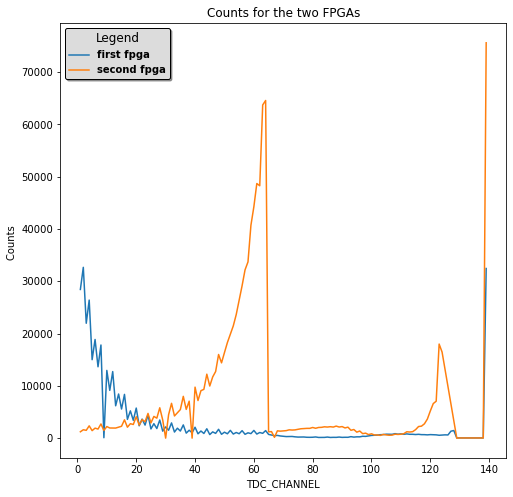

In [27]:
plt.figure(1, figsize=(8, 8))
data[data['FPGA']==1].groupby('TDC_CHANNEL').count().iloc[:,0].plot(label='first fpga')
data[data['FPGA']==0].groupby('TDC_CHANNEL').count().iloc[:,0].plot(label='second fpga')
plt.ylabel("Counts ")
plt.title('Counts for the two FPGAs')
plt.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', title_fontsize='large', prop={'weight':'bold','size':10})
plt.show()

In [16]:
# Finding the most noisy channels
group = data.groupby(['TDC_CHANNEL']).TDC_CHANNEL.count().sort_values(ascending=False)
noisy_channels = pd.DataFrame(group[:3])
noisy_channels = noisy_channels.rename(columns={'TDC_CHANNEL': 'COUNTS'})
print('The most noisy channels are:\n')
noisy_channels

The most noisy channels are:



,COUNTS
TDC_CHANNEL,
139,108059
64,66020
63,64642


**We see that the noisy channels foundings are backed up by the plots**

In [17]:
print('The number of unique orbits are:\n', data['ORBIT_CNT'].nunique())

The number of unique orbits are:
 11001


In [18]:
print('The number of orbits with at least 1 measurment from TDC_CHANNEL=139 is:\n', data[data['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique())

The number of orbits with at least 1 measurment from TDC_CHANNEL=139 is:
 10976
